In [5]:
import pandas as pd
import os

# Ruta a la carpeta que contiene los archivos (ajústala según tu entorno)
folder_path = "C:\\Users\\Lenovo\\Desktop\\tesis\\repositorio\\inflow\\data"

# Lista para almacenar cada DataFrame
dataframes = []

# Función para convertir la columna afluente a numérico
def convert_to_numeric(value):
    try:
        return pd.to_numeric(value.replace(",", "."))
    except ValueError:
        return pd.NA

# Recorrer cada archivo en la carpeta
for file_name in os.listdir(folder_path):
    # Asegurarse de que es un archivo TSV
    if file_name.endswith('.tsv'):
        # Ruta completa al archivo
        file_path = os.path.join(folder_path, file_name)
        # Leer el archivo TSV
        df = pd.read_csv(file_path, sep='\t')
        # Convertir la columna 'fecha' a datetime
        df['fecha'] = pd.to_datetime(df['fecha'])
        # Convertir la columna 'afluente' a numérico
        df['afluente'] = df['afluente'].apply(convert_to_numeric)
        # Agregar el DataFrame a la lista
        dataframes.append(df)

# Concatenar todos los DataFrames
combined_df = pd.concat(dataframes, ignore_index=True)

# Mostrar el DataFrame combinado
print(combined_df)


      nombre_embalse      fecha    afluente
0              CHAPO 2016-01-01   14.300000
1          INVERNADA 2016-01-01   51.370000
2               LAJA 2016-01-01   42.480000
3             MELADO 2016-01-01   31.110000
4            POLCURA 2016-01-01   33.360000
...              ...        ...         ...
31736         PANGUE 2023-12-31   14.604685
31737      PEHUENCHE 2023-12-31  262.028856
31738        POLCURA 2023-12-31   55.855940
31739          RALCO 2023-12-31  169.000000
31740          RAPEL 2023-12-31  277.013900

[31741 rows x 3 columns]


In [7]:
combined_df

,nombre_embalse,fecha,afluente
0,CHAPO,2016-01-01,14.300000
1,INVERNADA,2016-01-01,51.370000
2,LAJA,2016-01-01,42.480000
3,MELADO,2016-01-01,31.110000
4,POLCURA,2016-01-01,33.360000
...,...,...,...
31736,PANGUE,2023-12-31,14.604685
31737,PEHUENCHE,2023-12-31,262.028856
31738,POLCURA,2023-12-31,55.855940
31739,RALCO,2023-12-31,169.000000


In [9]:
# Pivotar el DataFrame para que cada embalse sea una columna y las filas sean fechas
df_pivot = combined_df.pivot(index='fecha', columns='nombre_embalse', values='afluente')

# Restablecer el índice para que 'fecha' sea una columna
df_pivot.reset_index(inplace=True)

# Opcionalmente, ordenar por fecha si es necesario
df_pivot.sort_values('fecha', inplace=True)

# Mostrar el DataFrame pivotado
df_pivot

nombre_embalse,fecha,ANGOSTURA,CHAPO,COLBUN,INVERNADA,LAJA,MELADO,PANGUE,PEHUENCHE,POLCURA,RALCO,RAPEL
2917,2023-12-27,-300.191398,9.30,331.995249,36.90549,43.01369,36.00,25.640660,319.811476,64.40594,186.0,332.7083
2918,2023-12-28,-319.135403,31.20,306.424544,33.46157,71.65059,27.67,18.716516,296.596416,62.21377,188.0,324.5139
2919,2023-12-29,-219.857032,0.19,288.763205,35.03733,62.67215,23.48,17.578822,286.364629,59.70941,184.0,257.6389
2920,2023-12-30,-186.956886,1.99,301.154328,39.90162,53.04821,21.70,14.160122,267.394730,57.47159,171.0,280.3472
2921,2023-12-31,-210.935364,1.45,299.239965,33.65882,53.05267,16.75,14.604685,262.028856,55.85594,169.0,277.0139


In [10]:
df_pivot

nombre_embalse,fecha,ANGOSTURA,CHAPO,COLBUN,INVERNADA,LAJA,MELADO,PANGUE,PEHUENCHE,POLCURA,RALCO,RAPEL
0,2016-01-01,NaN,14.30,NaN,51.37000,42.48000,31.11,NaN,NaN,33.36000,116.0,234.5800
1,2016-01-02,NaN,8.30,NaN,53.70000,24.57000,30.14,NaN,NaN,32.50000,118.0,189.8600
2,2016-01-03,NaN,4.70,NaN,51.15000,42.71000,28.55,NaN,NaN,32.53000,123.0,196.8800
3,2016-01-04,NaN,7.40,NaN,46.75000,34.02000,27.28,NaN,NaN,31.71000,126.0,140.0000
4,2016-01-05,NaN,32.90,NaN,49.47000,34.05000,26.17,NaN,NaN,31.22000,126.0,80.5600
...,...,...,...,...,...,...,...,...,...,...,...,...
2917,2023-12-27,-300.191398,9.30,331.995249,36.90549,43.01369,36.00,25.640660,319.811476,64.40594,186.0,332.7083
2918,2023-12-28,-319.135403,31.20,306.424544,33.46157,71.65059,27.67,18.716516,296.596416,62.21377,188.0,324.5139
2919,2023-12-29,-219.857032,0.19,288.763205,35.03733,62.67215,23.48,17.578822,286.364629,59.70941,184.0,257.6389
2920,2023-12-30,-186.956886,1.99,301.154328,39.90162,53.04821,21.70,14.160122,267.394730,57.47159,171.0,280.3472


Interpolación: Antes de decidir eliminar las filas con NaN, se realizó una interpolación para intentar llenar estos valores de forma razonable. Sin embargo, la interpolación no siempre puede rellenar todos los NaN, especialmente si los valores faltantes están al principio o al final de la serie.

Imputación: Otra técnica es la imputación, donde se pueden llenar los NaN con valores estimados basados en el resto de los datos (como la media, mediana, o un modelo predictivo). Esta técnica no se utilizó aquí, ya que la interpolación era más apropiada para los datos de series de tiempo.

In [12]:
# Describir los datos nulos y valores cero
for column in df_pivot.columns:
    if column != 'fecha':  # Excluir la columna 'fecha' del análisis
        null_count = df_pivot[column].isna().sum()
        zero_count = (df_pivot[column] == 0).sum()
        print(f"Columna '{column}': {null_count} valores nulos, {zero_count} valores cero")

# Rellenar los valores nulos con interpolación
df_pivot_interpolated = df_pivot.interpolate(method='linear')

# Reemplazar los valores cero con el último valor no cero
for column in df_pivot.columns:
    if column != 'fecha':  # Excluir la columna 'fecha' del reemplazo
        df_pivot_interpolated[column] = df_pivot_interpolated[column].replace(0, method='ffill')

# Mostrar el DataFrame después del tratamiento
df_pivot_interpolated.head()

Columna 'ANGOSTURA': 122 valores nulos, 0 valores cero
Columna 'CHAPO': 0 valores nulos, 40 valores cero
Columna 'COLBUN': 173 valores nulos, 0 valores cero
Columna 'INVERNADA': 0 valores nulos, 7 valores cero
Columna 'LAJA': 0 valores nulos, 35 valores cero
Columna 'MELADO': 0 valores nulos, 3 valores cero
Columna 'PANGUE': 94 valores nulos, 0 valores cero
Columna 'PEHUENCHE': 11 valores nulos, 0 valores cero
Columna 'POLCURA': 0 valores nulos, 2 valores cero
Columna 'RALCO': 0 valores nulos, 1 valores cero
Columna 'RAPEL': 1 valores nulos, 27 valores cero


nombre_embalse,fecha,ANGOSTURA,CHAPO,COLBUN,INVERNADA,LAJA,MELADO,PANGUE,PEHUENCHE,POLCURA,RALCO,RAPEL
0,2016-01-01,NaN,14.3,NaN,51.37,42.48,31.11,NaN,NaN,33.36,116.0,234.58
1,2016-01-02,NaN,8.3,NaN,53.70,24.57,30.14,NaN,NaN,32.50,118.0,189.86
2,2016-01-03,NaN,4.7,NaN,51.15,42.71,28.55,NaN,NaN,32.53,123.0,196.88
3,2016-01-04,NaN,7.4,NaN,46.75,34.02,27.28,NaN,NaN,31.71,126.0,140.00
4,2016-01-05,NaN,32.9,NaN,49.47,34.05,26.17,NaN,NaN,31.22,126.0,80.56


In [19]:
# Convirtiendo valores negativos a positivos en la columna 'ANGOSTURA'
#df_pivot_interpolated['ANGOSTURA'] = df_pivot_interpolated['ANGOSTURA'].apply(lambda x: abs(x) if x < 0 else x)

# Convirtiendo valores negativos a positivos en todas las columnas excepto 'fecha'
for column in df_pivot_interpolated.columns:
    if column != 'fecha':  # Excluir la columna 'fecha'
        df_pivot_interpolated[column] = df_pivot_interpolated[column].apply(lambda x: abs(x) if x < 0 else x)

# Mostrando el DataFrame después de la modificación
df_pivot_interpolated.head()


nombre_embalse,fecha,ANGOSTURA,CHAPO,COLBUN,INVERNADA,LAJA,MELADO,PANGUE,PEHUENCHE,POLCURA,RALCO,RAPEL
0,2016-01-01,NaN,14.3,NaN,51.37,42.48,31.11,NaN,NaN,33.36,116.0,234.58
1,2016-01-02,NaN,8.3,NaN,53.70,24.57,30.14,NaN,NaN,32.50,118.0,189.86
2,2016-01-03,NaN,4.7,NaN,51.15,42.71,28.55,NaN,NaN,32.53,123.0,196.88
3,2016-01-04,NaN,7.4,NaN,46.75,34.02,27.28,NaN,NaN,31.71,126.0,140.00
4,2016-01-05,NaN,32.9,NaN,49.47,34.05,26.17,NaN,NaN,31.22,126.0,80.56


In [20]:
df_pivot_interpolated

nombre_embalse,fecha,ANGOSTURA,CHAPO,COLBUN,INVERNADA,LAJA,MELADO,PANGUE,PEHUENCHE,POLCURA,RALCO,RAPEL
0,2016-01-01,NaN,14.30,NaN,51.37000,42.48000,31.11,NaN,NaN,33.36000,116.0,234.5800
1,2016-01-02,NaN,8.30,NaN,53.70000,24.57000,30.14,NaN,NaN,32.50000,118.0,189.8600
2,2016-01-03,NaN,4.70,NaN,51.15000,42.71000,28.55,NaN,NaN,32.53000,123.0,196.8800
3,2016-01-04,NaN,7.40,NaN,46.75000,34.02000,27.28,NaN,NaN,31.71000,126.0,140.0000
4,2016-01-05,NaN,32.90,NaN,49.47000,34.05000,26.17,NaN,NaN,31.22000,126.0,80.5600
...,...,...,...,...,...,...,...,...,...,...,...,...
2917,2023-12-27,300.191398,9.30,331.995249,36.90549,43.01369,36.00,25.640660,319.811476,64.40594,186.0,332.7083
2918,2023-12-28,319.135403,31.20,306.424544,33.46157,71.65059,27.67,18.716516,296.596416,62.21377,188.0,324.5139
2919,2023-12-29,219.857032,0.19,288.763205,35.03733,62.67215,23.48,17.578822,286.364629,59.70941,184.0,257.6389
2920,2023-12-30,186.956886,1.99,301.154328,39.90162,53.04821,21.70,14.160122,267.394730,57.47159,171.0,280.3472


In [21]:
# Eliminando filas con valores NaN del DataFrame df_pivot_interpolated
df_cleaned = df_pivot_interpolated.dropna()

In [22]:
df_cleaned

nombre_embalse,fecha,ANGOSTURA,CHAPO,COLBUN,INVERNADA,LAJA,MELADO,PANGUE,PEHUENCHE,POLCURA,RALCO,RAPEL
10,2016-01-11,37.944947,0.09,116.366179,44.02000,50.98000,22.34,0.550764,85.761344,30.74000,107.0,102.0100
11,2016-01-12,29.370177,0.09,119.672689,41.96000,25.53000,22.13,2.040195,82.180961,30.52000,112.0,112.2200
12,2016-01-13,20.795407,0.10,108.076533,42.44000,33.92000,21.09,3.529625,71.708674,28.11000,107.0,49.7200
13,2016-01-14,55.700230,4.70,113.946618,41.98000,16.96000,20.42,8.643372,76.432149,28.86000,102.0,52.9200
14,2016-01-15,46.710008,3.20,85.565556,40.70000,25.39000,20.33,5.716256,53.416184,29.05000,95.0,85.9700
...,...,...,...,...,...,...,...,...,...,...,...,...
2917,2023-12-27,300.191398,9.30,331.995249,36.90549,43.01369,36.00,25.640660,319.811476,64.40594,186.0,332.7083
2918,2023-12-28,319.135403,31.20,306.424544,33.46157,71.65059,27.67,18.716516,296.596416,62.21377,188.0,324.5139
2919,2023-12-29,219.857032,0.19,288.763205,35.03733,62.67215,23.48,17.578822,286.364629,59.70941,184.0,257.6389
2920,2023-12-30,186.956886,1.99,301.154328,39.90162,53.04821,21.70,14.160122,267.394730,57.47159,171.0,280.3472


### Normalizacion 

In [23]:
from sklearn.preprocessing import MinMaxScaler

# Crear un objeto MinMaxScaler
scaler = MinMaxScaler()

# Seleccionar columnas para normalizar (todas excepto 'fecha')
columns_to_normalize = df_cleaned.columns.drop('fecha')

# Aplicar la normalización Min-Max a las columnas seleccionadas
df_cleaned[columns_to_normalize] = scaler.fit_transform(df_cleaned[columns_to_normalize])

# Mostrar el DataFrame después de la normalización
df_cleaned.head()


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23372\338229704.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[columns_to_normalize] = scaler.fit_transform(df_cleaned[columns_to_normalize])


nombre_embalse,fecha,ANGOSTURA,CHAPO,COLBUN,INVERNADA,LAJA,MELADO,PANGUE,PEHUENCHE,POLCURA,RALCO,RAPEL
10,2016-01-11,0.014426,0.000000,0.023665,0.254432,0.060514,0.017299,0.000384,0.022350,0.026718,0.049650,0.020706
11,2016-01-12,0.011079,0.000000,0.024349,0.242447,0.030299,0.017136,0.001453,0.021416,0.026459,0.052833,0.022778
12,2016-01-13,0.007731,0.000015,0.021951,0.245240,0.040260,0.016331,0.002523,0.018686,0.023613,0.049650,0.010092
13,2016-01-14,0.021357,0.006780,0.023165,0.242563,0.020124,0.015812,0.006194,0.019917,0.024498,0.046467,0.010742
14,2016-01-15,0.017848,0.004574,0.017295,0.235116,0.030133,0.015742,0.004092,0.013916,0.024723,0.042011,0.017450


Prevención de sesgos: 

Sin normalización, las variables con magnitudes más grandes podrían dominar las que tienen magnitudes menores, lo que podría llevar a un sesgo en los resultados del análisis.

### Análisis de correlación

In [24]:
# Calculando la matriz de correlación para df_cleaned
correlation_matrix = df_cleaned[columns_to_normalize].corr()

# Mostrando la matriz de correlación
correlation_matrix

nombre_embalse,ANGOSTURA,CHAPO,COLBUN,INVERNADA,LAJA,MELADO,PANGUE,PEHUENCHE,POLCURA,RALCO,RAPEL
nombre_embalse,,,,,,,,,,,
ANGOSTURA,1.000000,0.305854,0.729397,0.326366,0.770269,0.589535,0.723427,0.722792,0.848071,0.775036,0.525950
CHAPO,0.305854,1.000000,0.146846,-0.043515,0.256786,0.127313,0.205458,0.134086,0.255600,0.264202,0.141566
COLBUN,0.729397,0.146846,1.000000,0.582419,0.857478,0.883012,0.512013,0.923692,0.888290,0.680394,0.593987
INVERNADA,0.326366,-0.043515,0.582419,1.000000,0.526733,0.597638,0.242602,0.566664,0.466308,0.419169,0.233665
LAJA,0.770269,0.256786,0.857478,0.526733,1.000000,0.842365,0.571248,0.836229,0.908273,0.856236,0.445523
MELADO,0.589535,0.127313,0.883012,0.597638,0.842365,1.000000,0.450813,0.853851,0.806274,0.691394,0.471496
PANGUE,0.723427,0.205458,0.512013,0.242602,0.571248,0.450813,1.000000,0.525618,0.615681,0.626509,0.441269
PEHUENCHE,0.722792,0.134086,0.923692,0.566664,0.836229,0.853851,0.525618,1.000000,0.874663,0.718241,0.590856
POLCURA,0.848071,0.255600,0.888290,0.466308,0.908273,0.806274,0.615681,0.874663,1.000000,0.877358,0.563551


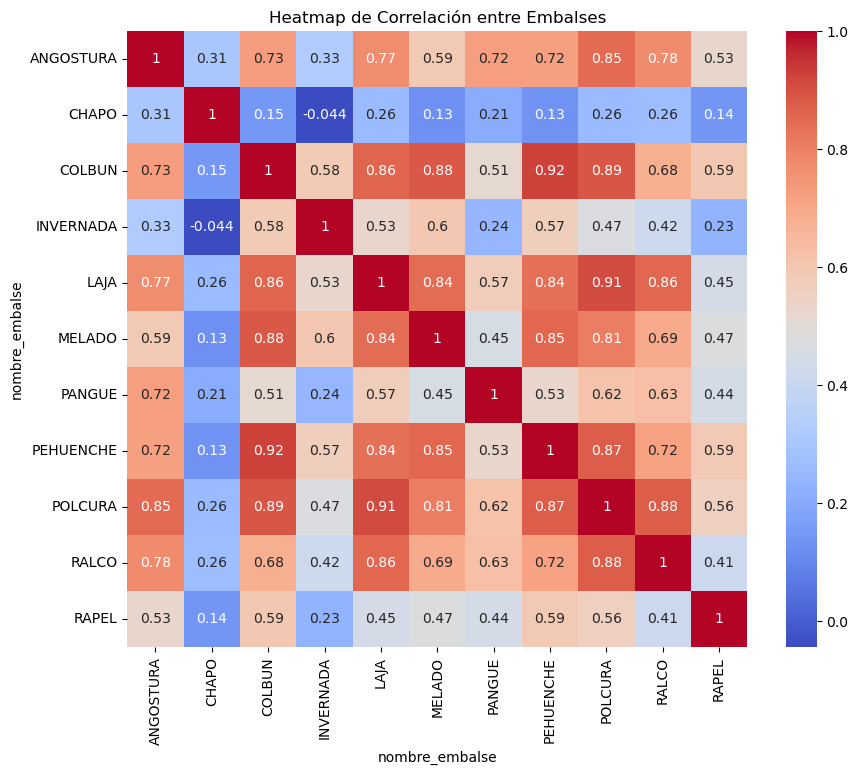

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

df_correlation_matrix = pd.DataFrame(correlation_matrix, index=correlation_matrix.keys())

# Creando un heatmap de la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(df_correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Heatmap de Correlación entre Embalses")
plt.show()


### Análisis de componentes PCA

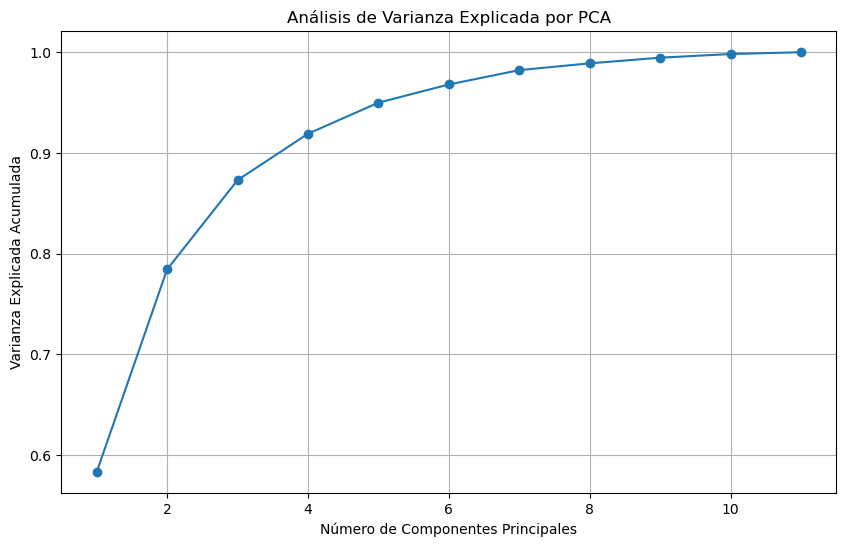

In [26]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Seleccionar las columnas numéricas para PCA
features = df_cleaned.columns.drop('fecha')

# Inicializar PCA sin especificar el número de componentes para calcular la varianza explicada
pca_full = PCA()

# Ajustar PCA a los datos normalizados
pca_full.fit(df_cleaned[features])

# Porcentaje de varianza explicada acumulada
varianza_explicada_acumulada = pca_full.explained_variance_ratio_.cumsum()

# Gráfico de la varianza explicada acumulada
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(varianza_explicada_acumulada) + 1), varianza_explicada_acumulada, marker='o')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada Acumulada')
plt.title('Análisis de Varianza Explicada por PCA')
plt.grid(True)
plt.show()


Dado que tu objetivo es minimizar la pérdida de información manteniendo la reducción de la dimensionalidad, la opción de 2 componentes parece ser la mejor decisión. Esto se debe a que ofrece un equilibrio entre una reducción significativa de la dimensionalidad y la retención de una gran parte de la información importante en tus datos.

Si bien 3 o 4 componentes pueden ofrecer una representación más completa, la ganancia adicional en la varianza explicada podría no justificar la complejidad adicional, especialmente si estás buscando simplificar tus datos para análisis o modelado posteriores.

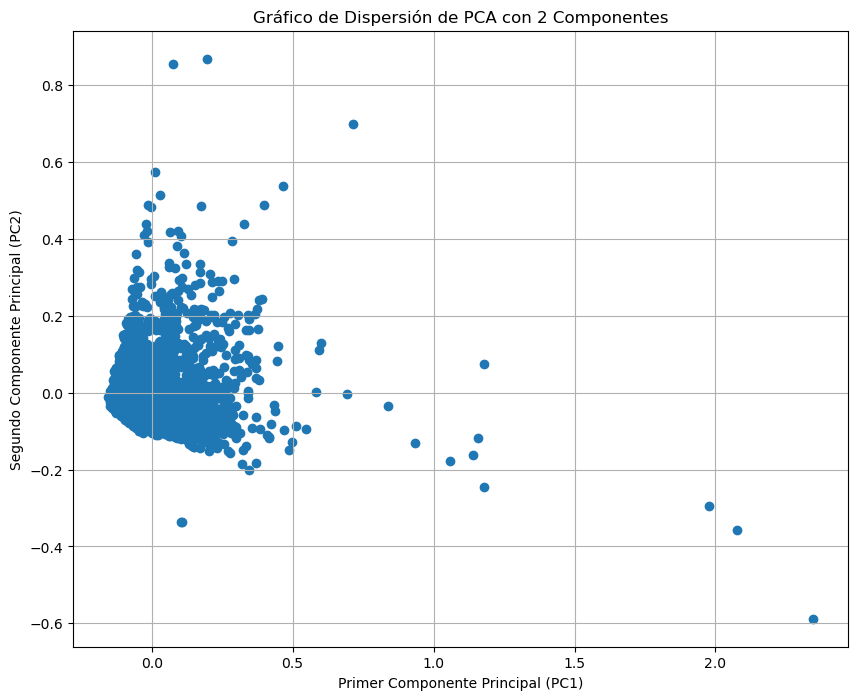

In [27]:
# Aplicando PCA con 2 componentes
pca_2 = PCA(n_components=2)
pca_2_result = pca_2.fit_transform(df_cleaned[features])

# Creando un DataFrame para los 2 componentes principales
df_pca_2 = pd.DataFrame(pca_2_result, columns=['PC1', 'PC2'])

# Añadiendo la fecha al DataFrame resultante
df_pca_2['fecha'] = df_cleaned['fecha'].values

# Gráfico de dispersión de los dos primeros componentes principales
plt.figure(figsize=(10, 8))
plt.scatter(df_pca_2['PC1'], df_pca_2['PC2'])
plt.xlabel('Primer Componente Principal (PC1)')
plt.ylabel('Segundo Componente Principal (PC2)')
plt.title('Gráfico de Dispersión de PCA con 2 Componentes')
plt.grid(True)
plt.show()

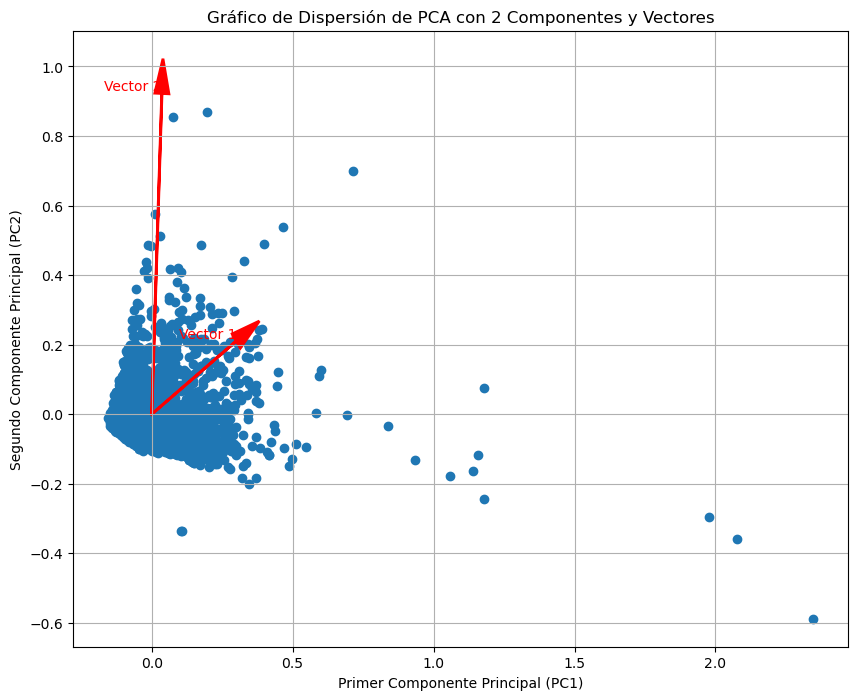

array([[ 0.29984022,  0.21037694,  0.22528113,  0.26155485,  0.34153615,
         0.26441389,  0.17677652,  0.2360309 ,  0.30445363,  0.60362124,
         0.12689398],
       [ 0.03598862,  0.92236297, -0.09079647, -0.33233197, -0.05009332,
        -0.1226999 ,  0.0116405 , -0.09750227, -0.0354168 , -0.02344465,
        -0.0158753 ]])

In [31]:
# Extracción de los vectores (cargas) de los dos primeros componentes principales
pca_vectors = pca_2.components_

# Gráfico de dispersión de los dos primeros componentes principales
plt.figure(figsize=(10, 8))
plt.scatter(df_pca_2['PC1'], df_pca_2['PC2'])

# Añadiendo los vectores al gráfico
for i, v in enumerate(pca_vectors):
    plt.arrow(0, 0, v[0], v[1], head_width=0.05, head_length=0.1, linewidth=2, color='red')
    plt.text(v[0], v[1], f"Vector {i+1}", color='red', ha='right', va='bottom')

plt.xlabel('Primer Componente Principal (PC1)')
plt.ylabel('Segundo Componente Principal (PC2)')
plt.title('Gráfico de Dispersión de PCA con 2 Componentes y Vectores')
plt.grid(True)
plt.show()

pca_vectors


In [30]:
df_pca_2

,PC1,PC2,fecha
0,-0.031858,-0.105093,2016-01-11
1,-0.044131,-0.099753,2016-01-12
2,-0.046605,-0.100315,2016-01-13
3,-0.049167,-0.091777,2016-01-14
4,-0.054111,-0.090873,2016-01-15
...,...,...,...
2907,0.066464,-0.089102,2023-12-27
2908,0.076393,-0.052279,2023-12-28
2909,0.047319,-0.096894,2023-12-29
2910,0.040922,-0.103142,2023-12-30


In [35]:
from sklearn.preprocessing import MinMaxScaler

# Transformación inversa de PCA
datos_reconstruidos_pca = pca_2.inverse_transform(df_pca_2.drop('fecha', axis=1))

# Crear un DataFrame con los datos reconstruidos
df_reconstruidos_pca = pd.DataFrame(datos_reconstruidos_pca, columns=features)

# Escalado inverso si aplicaste MinMaxScaler antes de PCA
scaler = MinMaxScaler()
scaler.fit(df_cleaned[features])  # Asegúrate de ajustar el scaler con los datos originales
datos_originales_escalados_inversos = scaler.inverse_transform(df_reconstruidos_pca)

# Crear un DataFrame con los datos en su escala original
df_reconstruidos_escalados = pd.DataFrame(datos_originales_escalados_inversos, columns=features)
df_reconstruidos_escalados['fecha'] = df_pca_2['fecha'].values

df_reconstruidos_escalados.head()


nombre_embalse,ANGOSTURA,CHAPO,COLBUN,INVERNADA,LAJA,MELADO,PANGUE,PEHUENCHE,POLCURA,RALCO,RAPEL,fecha
0,0.027958,-0.032205,0.030982,0.154438,0.048155,0.033981,0.013625,0.032425,0.038542,0.081660,0.015924,2016-01-11
1,0.024470,-0.029862,0.027732,0.149453,0.043695,0.030081,0.011518,0.029007,0.034616,0.074126,0.014282,2016-01-12
2,0.023708,-0.030901,0.027226,0.148993,0.042878,0.029495,0.011074,0.028478,0.033883,0.072646,0.013977,2016-01-13
3,0.023247,-0.023565,0.025874,0.145486,0.041576,0.027771,0.010720,0.027041,0.032800,0.070900,0.013516,2016-01-14
4,0.021797,-0.023771,0.024678,0.143892,0.039842,0.026352,0.009857,0.025786,0.031263,0.067894,0.012875,2016-01-15


In [37]:
# Recuperando los nombres de las columnas de afluente (excluyendo 'fecha')
features_afluente = df_reconstruidos_escalados.columns.drop('fecha')

# Calcular el promedio de las columnas de afluente para cada fecha
df_reconstruidos_escalados['Promedio_Afluente'] = df_reconstruidos_escalados[features_afluente].mean(axis=1)

# Crear un nuevo DataFrame con la columna de promedio y fecha
df_afluente_promedio = df_reconstruidos_escalados[['fecha', 'Promedio_Afluente']]

df_afluente_promedio.head()

nombre_embalse,fecha,Promedio_Afluente
0,2016-01-11,0.040499
1,2016-01-12,0.037193
2,2016-01-13,0.036496
3,2016-01-14,0.035942
4,2016-01-15,0.034588


In [47]:
import plotly.express as px

# Asegúrate de que df_afluente_promedio es tu DataFrame y contiene las columnas 'fecha' y 'Promedio_Afluente'
# Creando un line plot para visualizar la serie de tiempo del 'Índice de Intensidad de Afluente'
fig = px.line(df_afluente_promedio, x='fecha', y='Promedio_Afluente', 
              title='Serie de Tiempo del Índice de Intensidad de Afluente',
              labels={'Promedio_Afluente': 'Índice de Intensidad de Afluente'})

# Mostrar el gráfico
fig.show()


### Interpretación de los Datos de Caudal Afluente Transformados
En nuestro análisis, hemos transformado los datos de caudales afluentes utilizando técnicas de normalización y PCA. Estos métodos han reescalado los valores a un rango entre 0 y 1, facilitando así la comparación y el modelado estadístico. Es importante comprender cómo interpretar estos valores transformados en el contexto de nuestro estudio.

### Unidad de Medida y Rango de Valores
La columna de salida, después de aplicar la transformación, representa los caudales afluentes en una escala relativa que oscila entre 0 y 1. Este rango no refleja los caudales en términos de una unidad de medida física tradicional (como m³/s), sino más bien como una proporción relativa o un porcentaje de la variabilidad observada en los datos originales.

### Interpretación de Valores Específicos
Valores entre 0 y 0.1: Estos valores representan condiciones normales o típicas de afluente. La mayoría de los registros caen dentro de este rango, lo que indica un flujo de agua estándar o esperado en los embalses.

Valores superiores a 0.1: Un valor que excede el umbral de 0.1 sugiere un afluente significativamente alto. Estas instancias pueden estar asociadas con eventos climáticos extremos, como fuertes lluvias o aluviones, que conducen a un aumento sustancial en el caudal. Cuando los valores se acercan a 1, esto indica situaciones excepcionalmente críticas donde el caudal es extremadamente alto.
Aplicación Práctica y Decisiones Basadas en Datos

Esta escala transformada nos permite identificar y analizar patrones y tendencias significativas en los datos de afluente, especialmente en el contexto de la gestión de recursos hídricos y la planificación de respuestas a eventos extremos. La comparabilidad mejorada y la normalización de los datos facilitan el uso de modelos predictivos y análisis estadísticos, proporcionando una herramienta valiosa para la toma de decisiones basada en datos.